# OLS Regression

### Task: For each data set in Assignment4_linear_regression_data.xlsx:

1. Create a scatter plot and visually decide if a linear model is appropriate (a matrix scatter plot will would be most efficient).

2. If the relation is not linear, transform the data accordingly.

Try logarithm, exponential, square root, square, etc., for X and/or Y until you see a linear relation. You only need to report what is the transformation chosen, not all the attempts. Note: most of the time, you can guess visually. A systematic way is to create a matrix scatter plot of the different transformations. A generic way we did not cover is to use a Box-Cox transformation.

3. Create an OLS model for the original and transformed data if required.

Evaluate if the OLS assumptions are met: normality of errors centered around zero, equal variance, etc..., for the original data and transformed data if appropriate

Comment how the transformation impacted the different assumptions. (This should be done only by looking at the output diagnostic charts created by the software)

If datasets have outliers, remove the outliers and see the effect in the model (slope, intercept and R-square)

**The output of the assignment should be:**

1. OLS full report for the original and transformed data if appropriate (only two datasets should need transformation).

2. A short comment on the validity of the linear assumptions for the original and transformed data set when appropriate (it should not need to be longer than a couple of sentences).

3. An interpretation of the slope and intercept in relation to the original data, i.e. if the model is linear [intercept value] is the expected value when the independent variable is zero, etc.). If the model is not linear, you need to transform the equation back to its original form.

4. If the dataset have outliers, determine if the outlier have leverage or not by comparing the OLS with and without the outliers

In [1]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sma
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import CooksDistance
from scipy import stats
from statsmodels.graphics.gofplots import ProbPlot

# Dataset 1

In [2]:
data_1 = pd.read_excel('Assignment4_linear_regresion_data.xlsx', 'Set 1')

In [3]:
data_1.describe()

,y,x
count,100.000000,100.000000
mean,29.193214,5.809318
std,13.186232,2.617712
min,6.288716,1.163897
25%,18.414725,3.873405
50%,27.597232,5.586470
75%,40.879564,7.996223
max,50.887917,9.910843


### Creating the scatter plot

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


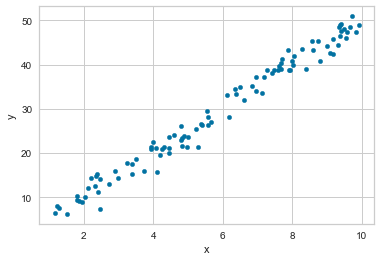

In [4]:
data_1.plot.scatter('x','y')
plt.show()

**From the scatter plot we can see that the relation between dependant and independant variable is almost linear so linear model is suitable for the given dataset.**

### Using boxplot to check for the presence of outliers in the dataset if any

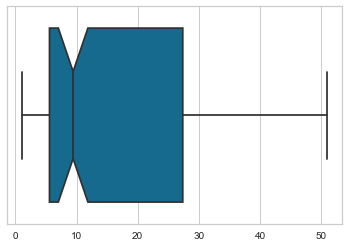

In [5]:
import seaborn as sns
sns.boxplot(data_1, notch=True)

### Implementing OLS
**OLS:** Ordinary least squares, or linear least squares, estimates the parameters in a regression model by minimizing the sum of the squared residuals. This method draws a line through the data points that minimizes the sum of the squared differences between the observed values and the corresponding fitted values.

Task is to solve linear regression for the data set of x and y.

Fit a line $y$ to the data such that $y = a + bx + e$

where: **a , b** are coefficents and **e** is an error term.

We know that:

$b = \frac{\sum_{i=1}^n(x_i - x_{mean}) * (y_i - y_{mean})} {\sum(x_i - x_{mean})^2}$

where $x_i$ , and $y_i$ are the indivdual observations and $x_{mean}$ , $y_{mean}$ are means of all $x_i$ and $y_i$

So a reasonable solution for a fit is:

$a = y_{mean} - b * x_{mean}$

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The slope is: 0.1964278131414699
The intercept is: 0.07495898746772411


<Figure size 360x360 with 0 Axes>

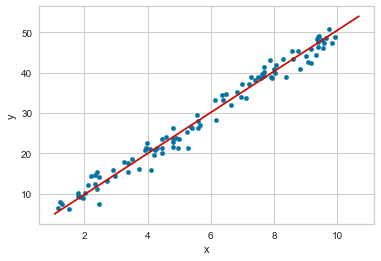

In [6]:
#implement least squares to find b
xi = data_1['x']
yi = data_1['y']

x_mean = xi.mean()
y_mean = yi.mean()

num = np.sum(np.multiply((xi - x_mean), (yi-y_mean)))
denom = np.sum(np.square(yi-y_mean))
b = num / denom
a = x_mean - b * y_mean

print('The slope is:', b)
print('The intercept is:', a)

#plot the regression line as x and y
y = np.arange(5, 55)
x = a + b * y

#plot the original data with the regression line
fig = plt.figure(figsize=(5,5))

data_1.plot.scatter('x','y')
plt.plot(x, y, c='r')
plt.show()

In [7]:
# OLS full summary report before transformation

formula_str = data_1.columns[-1]+' ~ '+'+'.join(data_1.columns[:-1])
model=sm.ols(formula=formula_str, data=data_1)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     4579.
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           4.47e-84
Time:                        17:56:37   Log-Likelihood:                -44.348
No. Observations:                 100   AIC:                             92.70
Df Residuals:                      98   BIC:                             97.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0750      0.093      0.807      0.4

**Intercept Interpretation:** Interpret the estimate, b0, only if there are data near zero and setting the explanatory variable to zero makes scientific sense. The meaning of b0 is the estimate of the mean outcome of y when x = 0, and should always be stated in terms of the actual variables of the study. The p-value for the intercept should be interpreted (with respect to retaining or rejecting H0 : β0 = 0) only if both the equality and the inequality of the mean outcome to zero when the explanatory variable is zero are scientifically plausible.[Reference](https://www.stat.cmu.edu/~hseltman/309/Book/chapter9.pdf)

The p-values help determine whether the relationships that you observe in your sample also exist in the larger population. The p-value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable. If there is no correlation, there is no association between the changes in the independent variable and the shifts in the dependent variable. In other words, there is insufficient evidence to conclude that there is effect at the population level [Reference](https://statisticsbyjim.com/regression/interpret-coefficients-p-values-regression/).
If the p-value for a variable is less than your significance level, your sample data provide enough evidence to reject the null hypothesis for the entire population. Your data favor the hypothesis that there is a non-zero correlation. Changes in the independent variable are associated with changes in the response at the population level. This variable is statistically significant and probably a worthwhile addition to your regression model.

It is standard practice to use the coefficient p-values to decide whether to include variables in the final model. As P>|t| is high for intercept indicates it is not a significant predictor of y. Keeping variables that are not statistically significant can reduce the model’s precision. 

**Slope Interpretation:** The interpretation of b1 is the change (increase or decrease in y depending on the sign) in the average outcome of y (dependant variable) when the explanatory variable increases by one unit. This should always be stated in terms of the actual variables of the study. Retention of the null hypothesis H0 : β1 =0 indicates no evidence that a change in x is associated with (or causes for a randomized experiment) a change in y. Rejection indicates that changes in x cause changes in y (assuming a randomized experiment).

As P>|t| is close to 0 indicates that x is a significantly important predictor of y.

**$R^2$ Interpretation:** The $R^2$ of a linear model describes the amount of variation in the response that is explained by the least squares line. For the given dataset $R^2$ is 0.979 which means 97.9% of total variance in y can be explained by the linear model.

#### The assumptions for linear regression are:

**1. Linearity:** The relationship between X and the mean of Y is linear.

**2. Homoscedasticity:** The variance of residual is the same for any value of X.

**3. Independence:** Observations are independent of each other.

**4. Normality:** For any fixed value of X, Y is normally distributed.

#### In a nutshell, the linear model should produce residuals that have a mean of zero, have a constant variance, and are not correlated with themselves or other variables. 

[Reference 1] (http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/R/R5_Correlation-Regression/R5_Correlation-Regression7.html)

[Reference 2] (https://statisticsbyjim.com/regression/ols-linear-regression-assumptions/)

## Plots to check the validity of above mentioned linearity assumptions

### Residuals Plot/ Variabilities of Residuals vs. Fitted Values

Residuals, in the context of regression models, are the difference between the observed value of the target variable (y)
and the predicted value (ŷ), i.e. the error of the prediction. The residuals plot shows the difference between 
residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions 
within the target that may be susceptible to more or less error.

A common use of the residuals plot is to analyze the variance of the error of the regressor. If the points are randomly dispersed around the horizontal axis, a linear regression model is usually appropriate for the data; otherwise, a non-linear model is more appropriate. 

The plot of residuals versus predicted values is useful for checking the assumption of linearity and homoscedasticity. If the model does not meet the linear model assumption, we would expect to see residuals that are very large (big positive value or big negative value). To assess the assumption of linearity we want to ensure that the residuals are not too far away from 0 (standardized values less than -2 or greater than 2 are deemed problematic). To assess if the homoscedasticity assumption is met we look to make sure that there is no pattern in the residuals and that they are equally spread around the y = 0 line or An ideal Residuals vs Fitted plot will look like random noise; there won’t be any apparent patterns in the scatterplot and the red line would be horizontal.

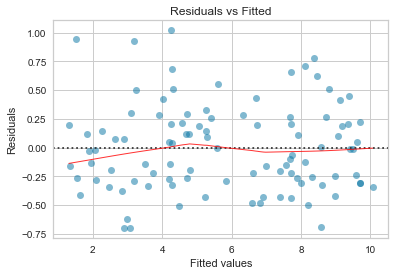

In [8]:
# Residual vs Fitted values plot

# model values
model_fitted_y = fitted.fittedvalues
# model residuals
model_residuals = fitted.resid
# normalized residuals
model_norm_residuals = fitted.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = fitted.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = fitted.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
# # Plotting the residuals after fitting a linear model using seaborn residplot function
# sns.residplot('y', 'x', data_1, lowess=True, order=1, color="g")
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, data_1.columns[-1], data=data_1,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

**In this case, we see a fairly random, uniform distribution of the residuals against the target in two dimensions. This seems to indicate that our linear model is performing well. We can also see from the histogram that our error is normally distributed around zero, which also generally indicates a well fitted model.**

### Normal QQ Plot/ Normality Plot

The normality assumption is evaluated based on the residuals and can be evaluated using a QQ-plot by comparing the residuals to "ideal" normal observations. Observations lie well along the 45-degree line in the QQ-plot, so we may assume that normality holds here.

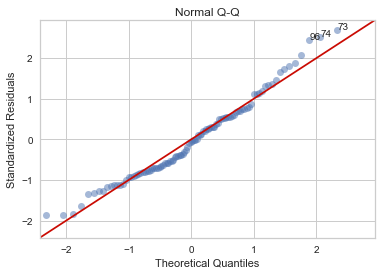

In [9]:
# Normal QQ Plot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));

**Looking at the graph above, there are some points that fall far away from the red line. This is indicative of the errors not being normally distributed, in fact our model suffers from “heavy tails”.**

### Scale-location plot

The third plot is a scale-location plot (square rooted standardized residual vs. predicted value). This is useful for checking the assumption of homoscedasticity. In this particular plot we are checking to see if there is a pattern in the residuals.

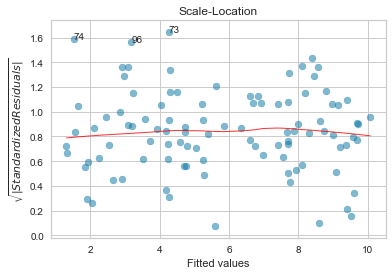

In [10]:
# Scale-location plot

plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i]));

**The more horizontal the red line is, the more likely the data is homoscedastic. The given dataset satisfy this assumption.**

### Residuals vs Leverage

Leverage points are nasty buggers. Unlike outliers, which have an unusually large y value, leverage points have extreme x values. This may not seem so bad at face value, but it can have damaging effects on the model because the β coefficients are very sensitive to leverage points. The purpose of the Residuals vs Leverage plot is to identify these problematic observations.[Reference](https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/)

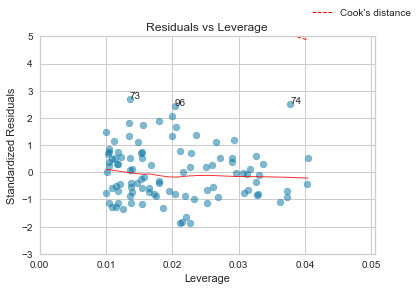

In [11]:
# Residual vs Leverage Plot

def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals, scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i], model_norm_residuals[i]));

p = len(fitted.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), np.linspace(0.001, max(model_leverage), 50)) # 1 line
plot_lm_4.legend(loc='upper right');

**We only need to find leverage points that have a Cook's distance greater than 0.5. In this plot, we do not have any leverage points that meet this criteria.**

### Cook's Plot

Cook’s Distance is a measure of how influential an instance is to the computation of a regression, e.g. if the instance is removed would the estimated coeficients of the underlying model be substantially changed? Because of this, Cook’s Distance is generally used to detect outliers in standard, OLS regression. In fact, a general rule of thumb is that D(i) > 4/n (or Cook's distance is close to 1 or more) is a good threshold for determining highly influential points as outliers and this visualizer can report the percentage of data that is above that threshold.

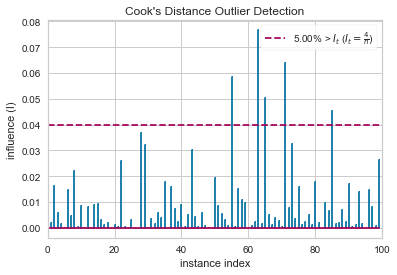

In [12]:
# Plotting cook's plot to visualize outliers using yellowbrick api 
# Instantiate and fit the visualizer
X = data_1['y'].values.reshape(-1,1)
y = data_1['x']
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()

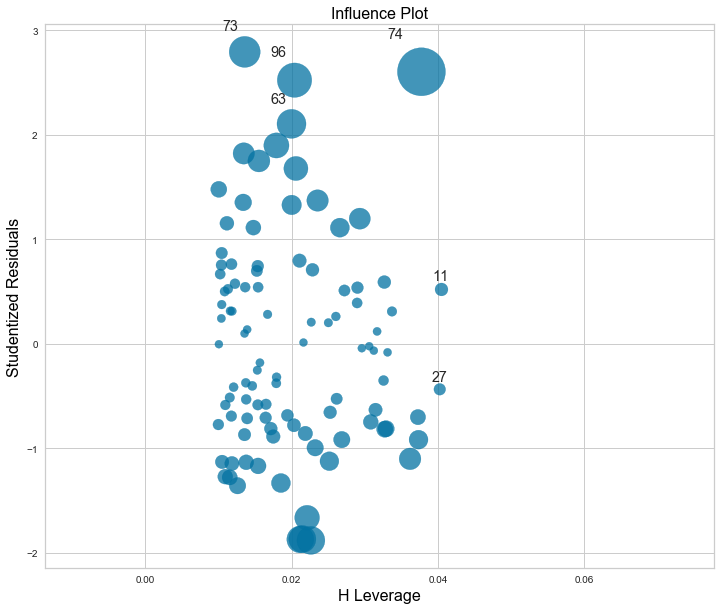

In [13]:
# Influence plot to visualize outliers

fig, ax = plt.subplots(figsize=(12,10))
fig = sma.graphics.influence_plot(fitted, ax=ax, criterion="cooks")

**Outliers may or may not be influential points. Influential outliers are of the greatest concern. They should never be disregarded. Careful scrutiny of the original data may reveal an error in data entry that can be corrected. If they remain excluded from the final fitted model, they must be noted in the final report or paper.**

**In this case, although observation 63 has larger Cook's distance than other data points in Cook's distance plot, this observation doesn't stand out in other plots. So we may decide to leave it in. A general rule-of-thumb is that a CD > k/n is noteworthy (k is # of predictors, n is sample size).**

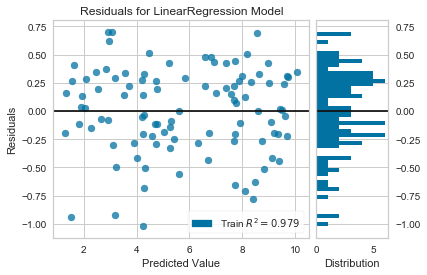

In [14]:
#Second way of plotting residual plot using yellowbrick api 

X = data_1['y'].values.reshape(-1,1)
y = data_1['x'].values.reshape(-1,1)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X, y)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

[0.03877799]
[[0.19786384]]


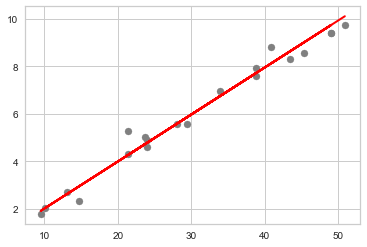

Mean Absolute Error: 0.29153952341226286
Mean Squared Error: 0.14631901617632506
Root Mean Squared Error: 0.38251668744817535


In [15]:
#OLS Verification with test dataset

X = data_1['y'].values.reshape(-1,1)
y = data_1['x'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Dataset 2

In [16]:
data_2 = pd.read_excel('Assignment4_linear_regresion_data.xlsx', 'Set 2')

In [17]:
data_2.describe()

,y,x
count,100.000000,100.000000
mean,26.774707,5.375184
std,15.620390,2.436456
min,-11.689840,1.123026
25%,16.281715,3.373599
50%,29.023364,5.012631
75%,37.267332,7.513979
max,63.932898,9.784536


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


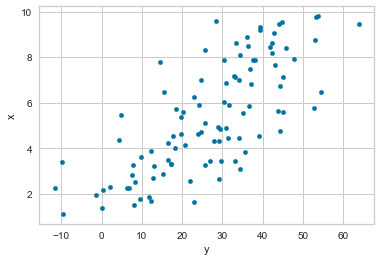

In [18]:
# Scatter plot to visualize outliers and linear model applicability
data_2.plot.scatter('y','x')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The slope is: 0.11623069016695207
The intercept is: 2.2631413226235324


<Figure size 360x360 with 0 Axes>

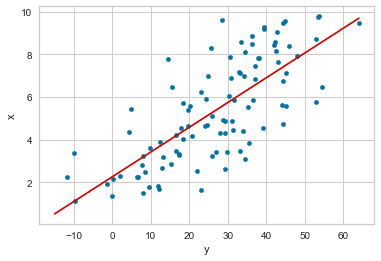

In [19]:
#implement least squares to find b
xi = data_2['x']
yi = data_2['y']
x_mean = xi.mean()
y_mean = yi.mean()

num = np.sum(np.multiply((xi - x_mean), (yi-y_mean)))
denom = np.sum(np.square(yi-y_mean))
b = num / denom
a = x_mean - b * y_mean

print('The slope is:', b)
print('The intercept is:', a)

#plot the regression line as x and y
y = np.arange(-15, 65)
x = a + b * y

#plot the original data with the regression line

fig = plt.figure(figsize=(5,5))
data_2.plot.scatter('y','x')
plt.plot(y, x, c='r')
plt.show()

In [20]:
# OLS full summary report
formula_str = data_2.columns[-1]+' ~ '+'+'.join(data_2.columns[:-1])
model=sm.ols(formula=formula_str, data=data_2)
fitted2 = model.fit()
print(fitted2.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     122.4
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           6.11e-19
Time:                        17:56:41   Log-Likelihood:                -189.93
No. Observations:                 100   AIC:                             383.9
Df Residuals:                      98   BIC:                             389.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2631      0.325      6.957      0.0

**Intercept Interpretation:** As P>|t| is close to 0 for intercept indicates it is a significant predictor of y.

**Slope Interpretation:** As P>|t| is close to 0 indicates that x is a significantly important predictor of y.

**$R^2$ Interpretation:** The $R^2$ of a linear model describes the amount of variation in the response that is explained by the least squares line. For the given dataset $R^2$ is 0.555 which means only 55.5% of total variance in y can be explained by the linear model.

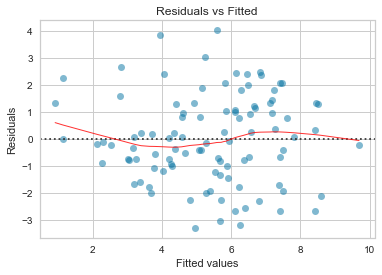

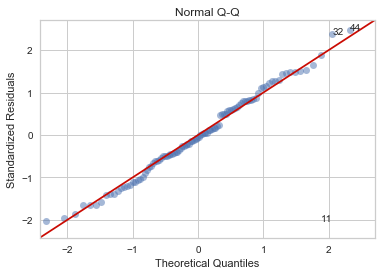

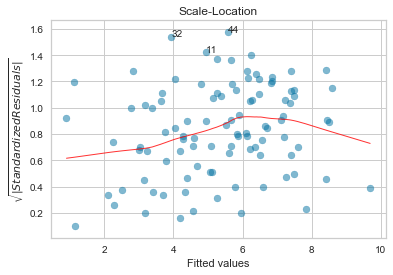

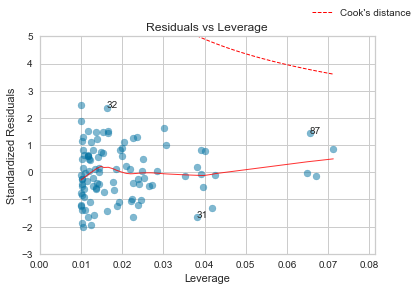

In [21]:
#Plots to verify linearity assumptions

# Residual vs Fitted Plot

model_fitted_y = fitted2.fittedvalues
# model residuals
model_residuals = fitted2.resid
# normalized residuals
model_norm_residuals = fitted2.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = fitted2.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = fitted2.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, data_2.columns[-1], data=data_2,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

# Normal QQ Plot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));
    
#Scale-location vs Fitted values plot

plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i]));
    
#Residual vs Leverage plot

def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals, scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i], model_norm_residuals[i]));

p = len(fitted.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), np.linspace(0.001, max(model_leverage), 50)) # 1 line
plot_lm_4.legend(loc='upper right');

**The plots above shows that given Set 2 satisfies the linearity assumptions.**

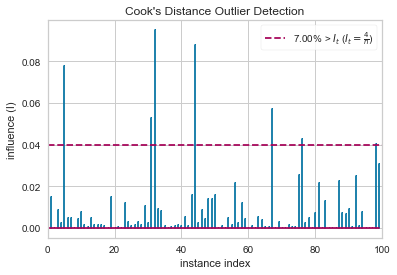

In [22]:
# Plotting cook's plot to visualize outliers using yellowbrick api 
# Instantiate and fit the visualizer
X = data_2['x'].values.reshape(-1,1)
y = data_2['y']
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()

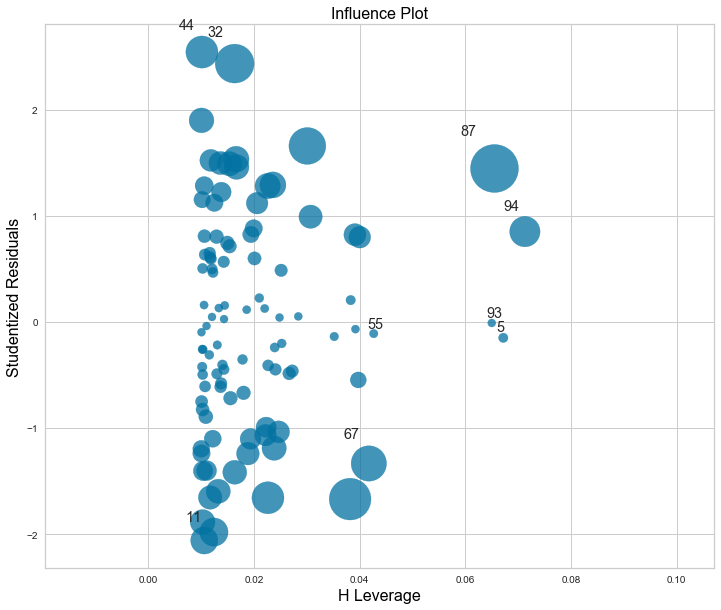

In [23]:
# Influence plot to visualize outliers
fig, ax = plt.subplots(figsize=(12,10))
fig = sma.graphics.influence_plot(fitted2, ax=ax, criterion="cooks")

**The influence plot shows that there are outliers present in the given dataset which we need to remove.**

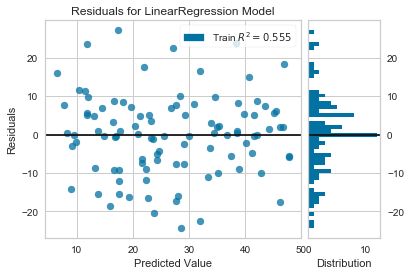

In [24]:
# Residual plot before removing outliers

X = data_2['x'].values.reshape(-1,1)
y = data_2['y'].values.reshape(-1,1)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X, y)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

(100, 2)
(96, 2)


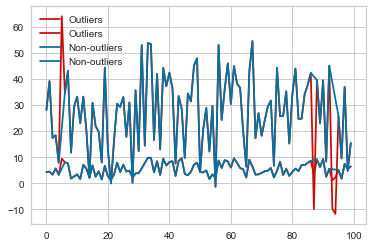

In [25]:
# Removing outliers after calculating z-score
df2= data_2[(np.abs(stats.zscore(data_2)) < 2).all(axis=1)]
plt.plot(data_2,'r', label='Outliers')
plt.plot(df2, 'b' ,label='Non-outliers')
plt.legend()
print(data_2.shape)
print(df2.shape)

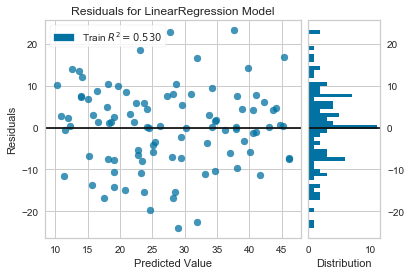

In [26]:
X = df2['x'].values.reshape(-1,1)
y = df2['y'].values.reshape(-1,1)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X, y)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

**In this dataset 2 there are points that lie far from the cloud, however, they falls in the cloud and does not appear to be influential. So, removing those observations is not going to improve the model performance.**

# Dataset 3

In [27]:
data_3 = pd.read_excel('Assignment4_linear_regresion_data.xlsx', 'Set 3')

In [28]:
data_3.describe()

,Y,x
count,100.000000,100.000000
mean,3853.843519,5.999130
std,3042.522716,2.444058
min,85.816012,1.095000
25%,1255.307962,4.307500
50%,3190.568047,6.214000
75%,5633.938126,8.110000
max,13259.109970,9.958000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


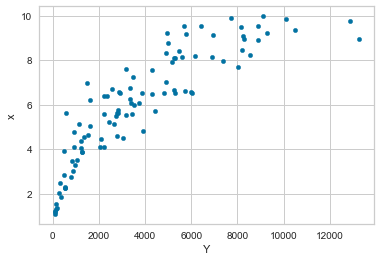

In [29]:
# Scatter plot to visualize the outliers and linear model applicability
data_3.plot.scatter('Y','x')
plt.show()

**From the scatter plot we can see that for the datset 3 linear model is not suitable.**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The slope is: 0.0006980926208998648
The intercept is: 3.3087902774410316


<Figure size 360x360 with 0 Axes>

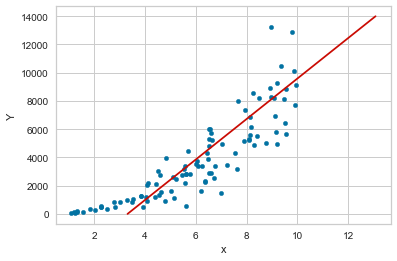

In [30]:
#implement least squares to find b

xi = data_3['x']
yi = data_3['Y']
x_mean = xi.mean()
y_mean = yi.mean()

num = np.sum(np.multiply((xi - x_mean), (yi-y_mean)))
denom = np.sum(np.square(yi-y_mean))
b = num / denom
a = x_mean - b * y_mean

print('The slope is:', b)
print('The intercept is:', a)

#plot the regression line as x and y
Y = np.arange(0, 14000)
x = a + b * Y

#plot the original data with the regression line

fig = plt.figure(figsize=(5,5))
data_3.plot.scatter('x','Y')
plt.plot(x, Y, c='r')
plt.show()

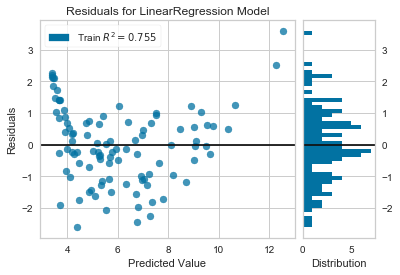

In [31]:
# Residual plot
y = data_3['Y'].values.reshape(-1,1)
x = data_3['x'].values.reshape(-1,1)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(y,x)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [32]:
# OLS full summary report before transformation
formula_str = data_3.columns[-1]+' ~ '+'+'.join(data_3.columns[:-1])
model=sm.ols(formula=formula_str, data=data_3)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     302.4
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           1.04e-31
Time:                        17:56:45   Log-Likelihood:                -160.39
No. Observations:                 100   AIC:                             324.8
Df Residuals:                      98   BIC:                             330.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3088      0.197     16.817      0.0

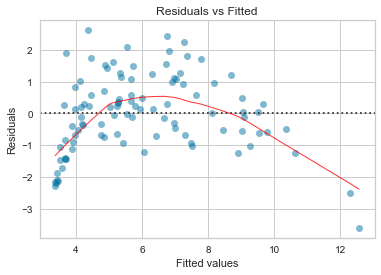

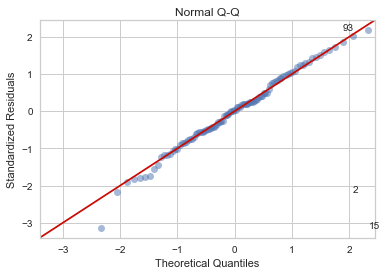

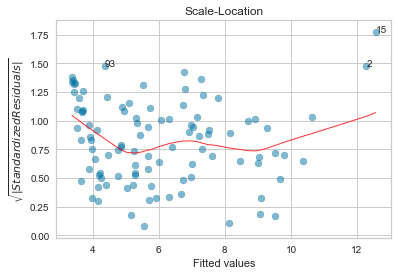

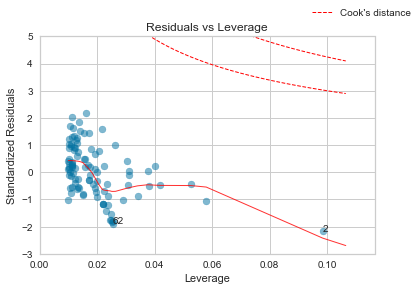

In [33]:
# Plots to verify OLS assumptions before transformation
# Residual vs Fitted Plot

model_fitted_y = fitted.fittedvalues
# model residuals
model_residuals = fitted.resid
# normalized residuals
model_norm_residuals = fitted.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = fitted.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = fitted.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, data_3.columns[-1], data=data_3,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

# Normal QQ Plot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));
    
#Scale-location vs Fitted values plot

plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i]));
    
#Residual vs Leverage plot

def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals, scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i], model_norm_residuals[i]));

p = len(fitted.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), np.linspace(0.001, max(model_leverage), 50)) # 1 line
plot_lm_4.legend(loc='upper right');

RMSE error is: 1343.4555871298937
R2 error is: 0.8030555375646454


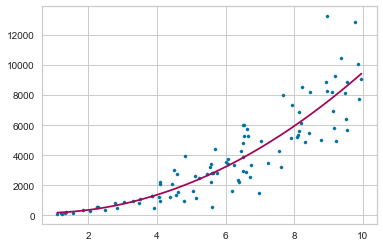

In [34]:
# Quadratic transformation

import operator

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print('RMSE error is:', rmse)
print('R2 error is:', r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

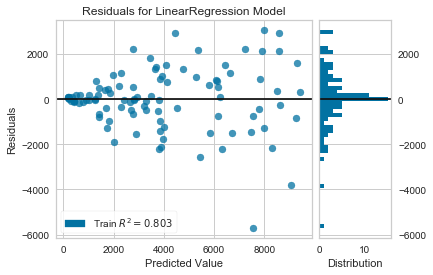

In [35]:
# Residual plot after applying quadratic transformation
X = x_poly
y = data_3['Y'].values.reshape(-1,1)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X, y)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

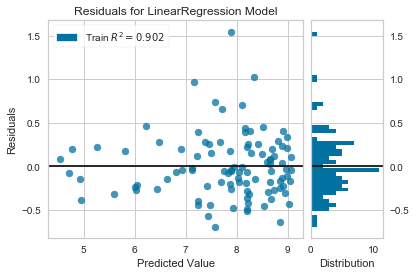

In [36]:
# # Residual plot after applying Log transformation
# y = np.log(data_3['Y']).values.reshape(-1,1)
# X = data_3['x'].values.reshape(-1,1)
data_3_trans = np.log(data_3)
Y = data_3_trans['Y'].values.reshape(-1,1)
X = data_3_trans['x'].values.reshape(-1,1)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X, Y)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


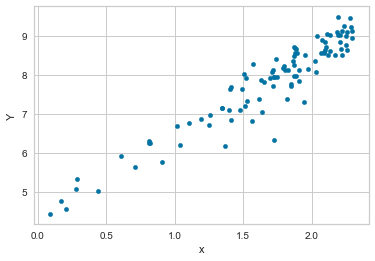

In [37]:
# Scatter plot after applying log transformation
data_3_trans.plot.scatter('x','Y')
# plt.plot(x, Y, c='r')
plt.show()

In [38]:
# OLS full summary report after log transformation
formula_str = data_3_trans.columns[-1]+' ~ '+'+'.join(data_3_trans.columns[:-1])
model=sm.ols(formula=formula_str, data=data_3_trans)
fitted3 = model.fit()
print(fitted3.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     904.8
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           2.74e-51
Time:                        17:56:46   Log-Likelihood:                 36.795
No. Observations:                 100   AIC:                            -69.59
Df Residuals:                      98   BIC:                            -64.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.7479      0.115    -15.189      0.0

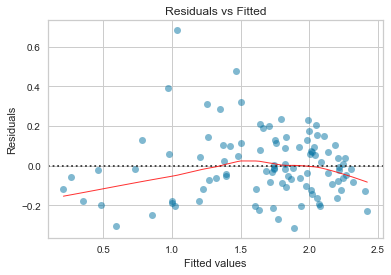

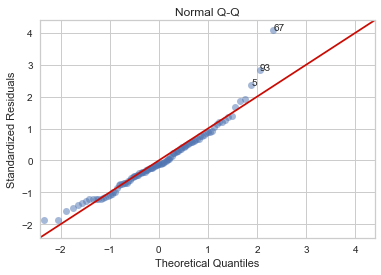

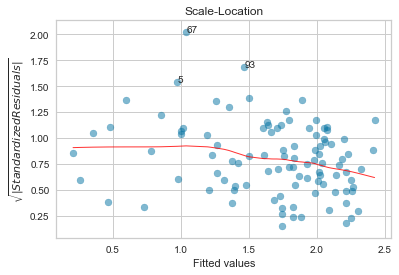

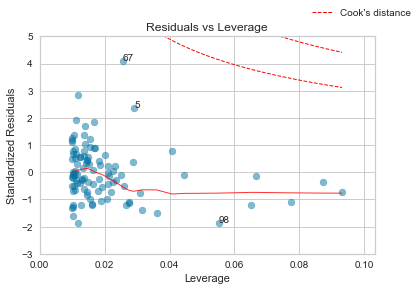

In [39]:
# Plots to verify OLS assumptions after transformation
# Residual vs Fitted Plot

model_fitted_y = fitted3.fittedvalues
# model residuals
model_residuals = fitted3.resid
# normalized residuals
model_norm_residuals = fitted3.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = fitted3.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = fitted3.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, data_3_trans.columns[-1], data=data_3_trans,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

# Normal QQ Plot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));
    
#Scale-location vs Fitted values plot

plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i]));
    
#Residual vs Leverage plot

def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals, scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i], model_norm_residuals[i]));

p = len(fitted.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), np.linspace(0.001, max(model_leverage), 50)) # 1 line
plot_lm_4.legend(loc='upper right');

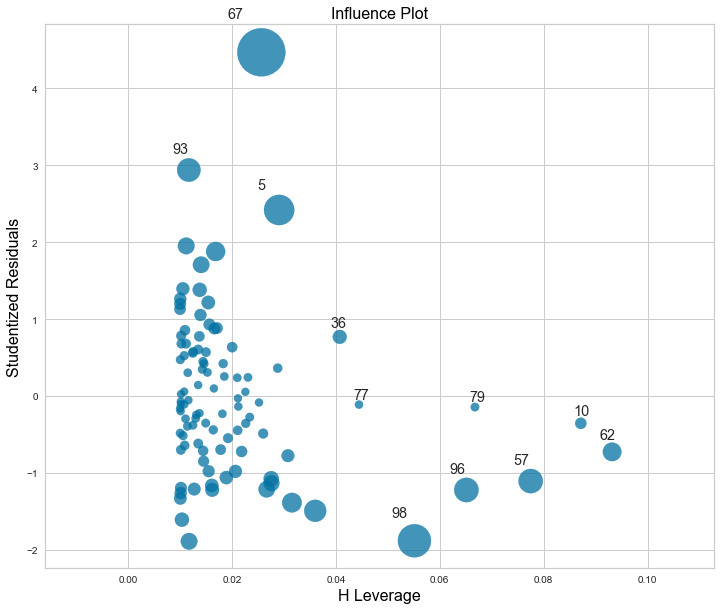

In [40]:
# Influence plot to visualize outliers
fig, ax = plt.subplots(figsize=(12,10))
fig = sma.graphics.influence_plot(fitted3, ax=ax, criterion="cooks")

**Based on scatter plot, dataset 3 does seem to be linear after transformation.**

**After analyzing the plots for linearity assumptions it is concluded that after applying log transformation all assumptions are fulfilled and hence model is performing really well. The residuals are normally distributed and centered on 0, with a skew close to 0 and kurtosis equal to 5 (>3). The variability of the residuals is not constant along the whole range since the Prob(Omnibus) is close to 0 and Ombibus is 20.5. The Durbin-Watson statistic is 1.7, indicating that there is no autocorrelation in the data and the observations are independent.**

**From the influence plot above no outliers are observed.**

# Dataset 4

In [41]:
data_4 = pd.read_excel('Assignment4_linear_regresion_data.xlsx', 'Set 4')

In [42]:
data_4.describe()

,Y,x
count,1.000000e+02,100.000000
mean,6.614429e+05,5.227871
std,1.311668e+06,2.986073
min,2.053452e+02,0.148800
25%,3.791669e+03,2.462475
50%,6.403172e+04,5.502350
75%,9.252337e+05,8.037525
max,8.240777e+06,9.897300


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


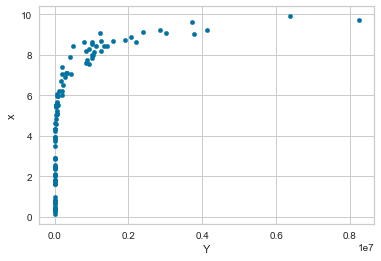

In [43]:
# Scatter plot to visualize population pattern and outliers
data_4.plot.scatter('Y','x')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The slope is: 1.4027048605134243e-06
The intercept is: 4.30006188025644


<Figure size 360x360 with 0 Axes>

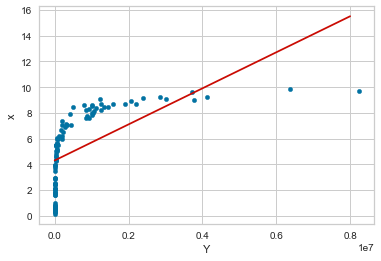

In [44]:
#implement least squares to find b
xi = data_4['x']
yi = data_4['Y']
x_mean = xi.mean()
y_mean = yi.mean()

num = np.sum(np.multiply((xi - x_mean), (yi-y_mean)))
denom = np.sum(np.square(yi-y_mean))
b = num / denom
a = x_mean - b * y_mean

print('The slope is:', b)
print('The intercept is:', a)

#plot the regression line as x and y
Y = np.arange(0, 8000000)
x = a + b * Y

#plot the original data with the regression line

fig = plt.figure(figsize=(5,5))
data_4.plot.scatter('Y','x')
plt.plot(Y, x, c='r')
plt.show()

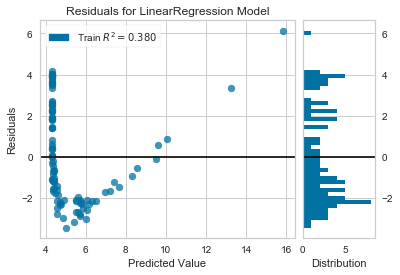

In [45]:
# residual plot of OLS with R2
X = data_4['Y'].values.reshape(-1,1)
y = data_4['x'].values.reshape(-1,1)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X, y)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [46]:
# OLS full summary before transformation
formula_str = data_4.columns[-1]+' ~ '+'+'.join(data_4.columns[:-1])
model=sm.ols(formula=formula_str, data=data_4)
fitted4 = model.fit()
print(fitted4.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     59.97
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           8.87e-12
Time:                        17:56:50   Log-Likelihood:                -226.91
No. Observations:                 100   AIC:                             457.8
Df Residuals:                      98   BIC:                             463.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3001      0.265     16.226      0.0

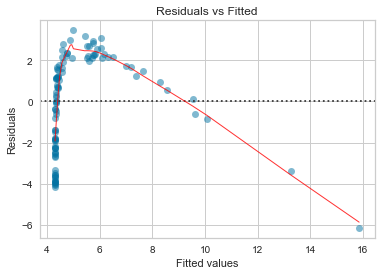

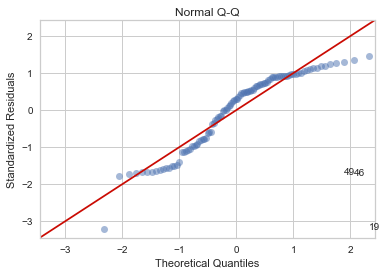

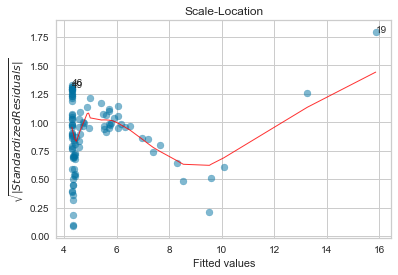

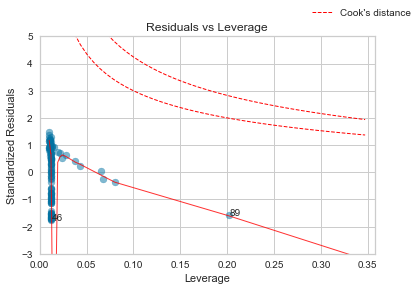

In [47]:
# Plots to verify OLS assumptions before transformation
# Residual vs Fitted Plot

model_fitted_y = fitted4.fittedvalues
# model residuals
model_residuals = fitted4.resid
# normalized residuals
model_norm_residuals = fitted4.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = fitted4.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = fitted4.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, data_4.columns[-1], data=data_4,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

# Normal QQ Plot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));
    
#Scale-location vs Fitted values plot

plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i]));
    
#Residual vs Leverage plot

def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals, scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i], model_norm_residuals[i]));

p = len(fitted.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), np.linspace(0.001, max(model_leverage), 50)) # 1 line
plot_lm_4.legend(loc='upper right');

Intercept: [-5.49945488]
Coeffcient: [[0.98923833]]


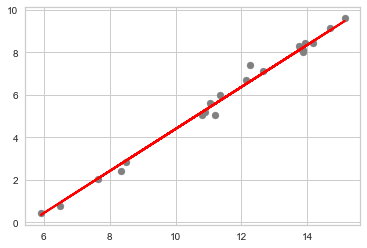

Mean Absolute Error: 0.19175357853454816
Mean Squared Error: 0.06648594223548007
Root Mean Squared Error: 0.2578486808876091


In [48]:
# Applying log transformation on one variable

X = np.log(data_4['Y']).values.reshape(-1,1)
y = data_4['x'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print('Intercept:', regressor.intercept_)
#For retrieving the slope:
print('Coeffcient:', regressor.coef_)

y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

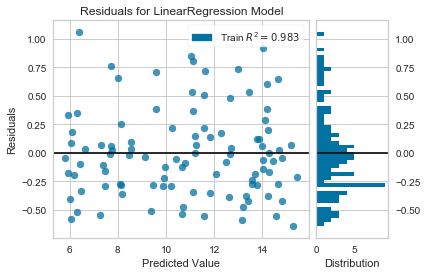

In [49]:
# Residual plot after applying Log transformation on one variable
data_4_trans= pd.DataFrame()
data_4_trans['Y'] = np.log(data_4['Y'])
data_4_trans['x'] = data_4['x']

Y = data_4_trans['Y'].values.reshape(-1,1)
X = data_4_trans['x'].values.reshape(-1,1)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X, Y)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


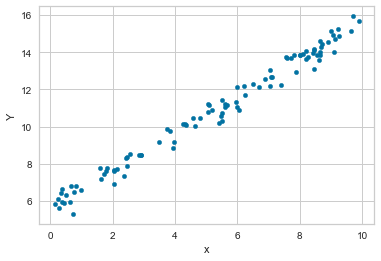

In [50]:
# Scatter plot after applying log transformation
data_4_trans.plot.scatter('x','Y')
plt.show()

In [51]:
# OLS full summary after transformation
formula_str = data_4_trans.columns[-1]+' ~ '+'+'.join(data_4_trans.columns[:-1])
model=sm.ols(formula=formula_str, data=data_4_trans)
fitted4 = model.fit()
print(fitted4.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     5765.
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           6.91e-89
Time:                        17:56:52   Log-Likelihood:                -46.212
No. Observations:                 100   AIC:                             96.42
Df Residuals:                      98   BIC:                             101.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5398      0.147    -37.680      0.0

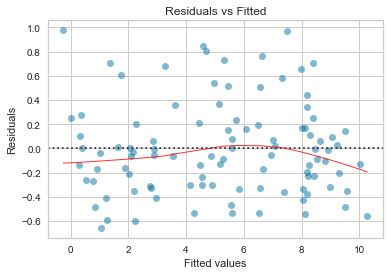

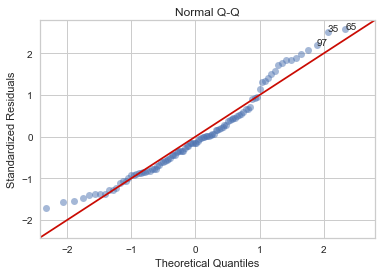

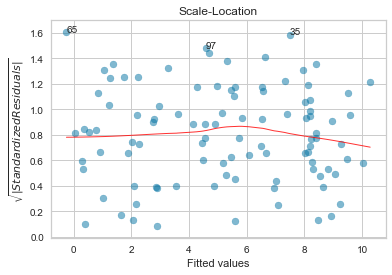

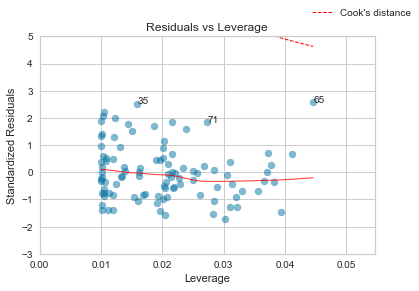

In [52]:
# Plots to verify OLS assumptions after log transformation
# Residual vs Fitted Plot

model_fitted_y = fitted4.fittedvalues
# model residuals
model_residuals = fitted4.resid
# normalized residuals
model_norm_residuals = fitted4.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = fitted4.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = fitted4.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, data_4_trans.columns[-1], data=data_4_trans,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

# Normal QQ Plot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));
    
#Scale-location vs Fitted values plot

plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i]));
    
#Residual vs Leverage plot

def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals, scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i], model_norm_residuals[i]));

p = len(fitted.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), np.linspace(0.001, max(model_leverage), 50)) # 1 line
plot_lm_4.legend(loc='upper right');

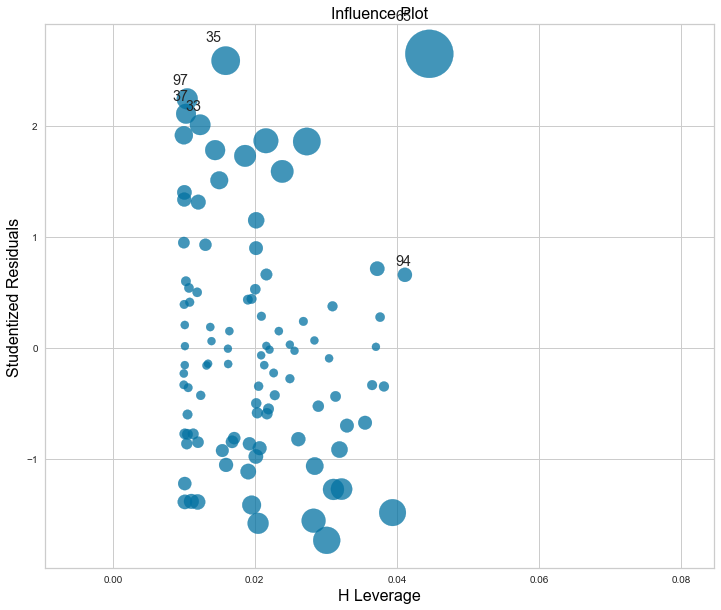

In [53]:
# Influence plot to visualize outliers
fig, ax = plt.subplots(figsize=(12,10))
fig = sma.graphics.influence_plot(fitted4, ax=ax, criterion="cooks")

**Based on scatter plot, dataset 4 does seem to be linear after transformation.**

**After analyzing the plots for linearity assumptions it is concluded that after applying log transformation all assumptions are fulfilled and hence model is performing really well. The residuals are normally distributed and centered on 0, with a skew close to 0 and kurtosis equal to 3. The variability of the residuals is not constant along the whole range since the Prob(Omnibus) is close to 0 and Ombibus is 6.7. The Durbin-Watson statistic is 2, indicating that there is no autocorrelation in the data and the observations are independent.**

**From the influence plot above no outliers are observed.**

# Dataset 5

In [54]:
data_5 = pd.read_excel('Assignment4_linear_regresion_data.xlsx', 'Set 5')

In [55]:
data_5.describe()

,Y,X
count,101.000000,101.000000
mean,24.640736,4.975682
std,15.143420,2.852301
min,-4.448560,0.169400
25%,12.535342,2.314200
50%,25.659742,5.003200
75%,39.077962,7.460200
max,52.839325,9.970710


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


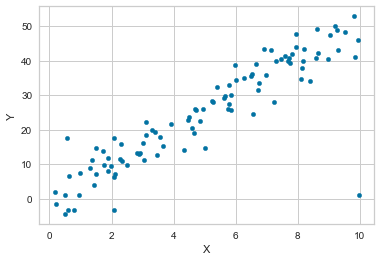

In [56]:
data_5.plot.scatter('X','Y')
plt.show()

**From the scatter plot we can see that linear model is appropriate for this dataset (Set 5).**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The slope is: 0.16912015900942262
The intercept is: 0.8084370513582035


<Figure size 360x360 with 0 Axes>

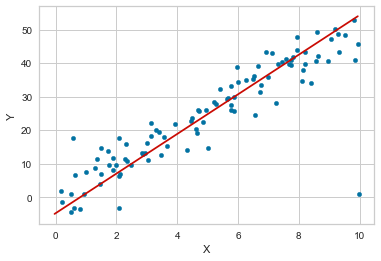

In [57]:
#implementing least squares to find b

xi = data_5['X']
yi = data_5['Y']
x_mean = xi.mean()
y_mean = yi.mean()

num = np.sum(np.multiply((xi - x_mean), (yi-y_mean)))
denom = np.sum(np.square(yi-y_mean))
b = num / denom
a = x_mean - b * y_mean

print('The slope is:', b)
print('The intercept is:', a)

#plot the regression line as x and y
Y = np.arange(-5, 55)
X = a + b * Y

#plot the original data with the regression line

fig = plt.figure(figsize=(5,5))
data_5.plot.scatter('X','Y')
plt.plot(X, Y, c='r')
plt.show()

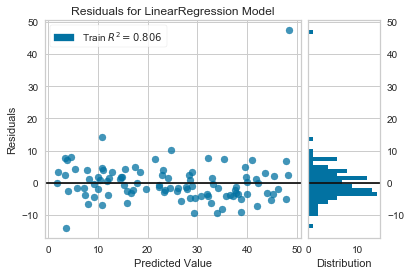

In [58]:
#OLS residual plot

X = data_5['X'].values.reshape(-1,1)
y = data_5['Y'].values.reshape(-1,1)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X, y)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [59]:
#OLS full report

formula_str = data_5.columns[-1]+' ~ '+'+'.join(data_5.columns[:-1])
model=sm.ols(formula=formula_str, data=data_5)
fitted5 = model.fit()
print(fitted5.summary())

                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     411.9
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           4.70e-37
Time:                        17:56:54   Log-Likelihood:                -165.80
No. Observations:                 101   AIC:                             335.6
Df Residuals:                      99   BIC:                             340.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8084      0.241      3.359      0.0

**Intercept Interpretation:** As P>|t| is close to 0 for intercept indicates it is a significant predictor of y.

**Slope Interpretation:** As P>|t| is close to 0 indicates that x is a significantly important predictor of y.

**$R^2$ Interpretation:** The $R^2$ of a linear model describes the amount of variation in the response that is explained by the least squares line. For the given dataset $R^2$ is 0.806 which means 80.6% of total variance in y can be explained by the linear model.

**The residuals are not normally distributed and not centered on 0, with a high skew close of 3.583 and kurtosis of 27.497. The variability of the residuals is not constant along the whole range since the Prob(Omnibus) is close to 0 and Ombibus is 114.244. The Durbin-Watson statistic is nearly 1.5, indicating that there is no autocorrelation in the data and the observations are independent.**

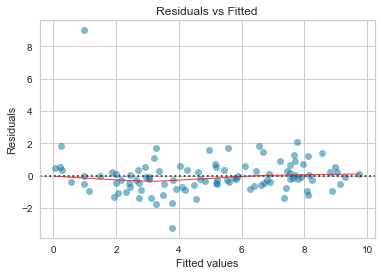

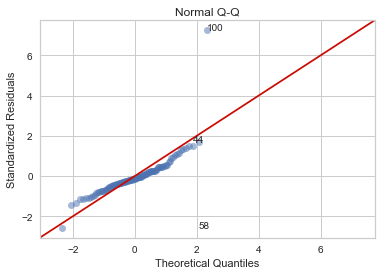

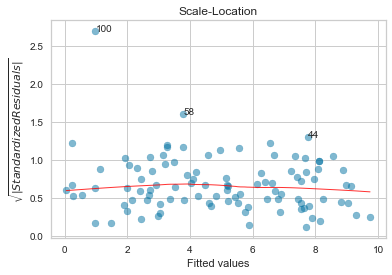

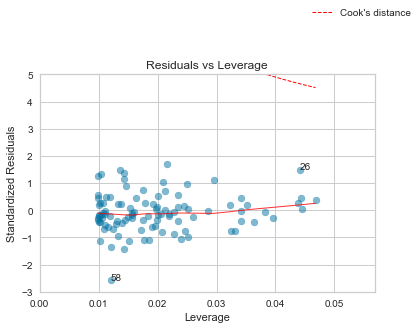

In [60]:
# Plots to verify OLS assumptions
# Residual vs Fitted Plot

model_fitted_y = fitted5.fittedvalues
# model residuals
model_residuals = fitted5.resid
# normalized residuals
model_norm_residuals = fitted5.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = fitted5.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = fitted5.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, data_5.columns[-1], data=data_5,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

# Normal QQ Plot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));
    
#Scale-location vs Fitted values plot

plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i]));
    
#Residual vs Leverage plot

def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals, scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i], model_norm_residuals[i]));

p = len(fitted.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), np.linspace(0.001, max(model_leverage), 50)) # 1 line
plot_lm_4.legend(loc='upper right');

**From the above plots we can see that the dataset 5 satisfies the linearity assumptions. **

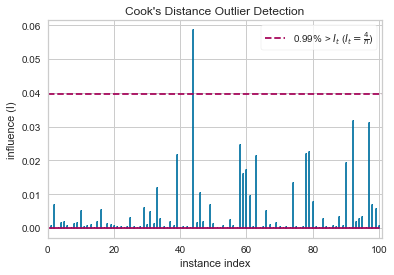

In [61]:
# Plotting cook's plot to visualize outliers using yellowbrick api 
# Instantiate and fit the visualizer
X = data_5['Y'].values.reshape(-1,1)
y = data_5['X']
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()

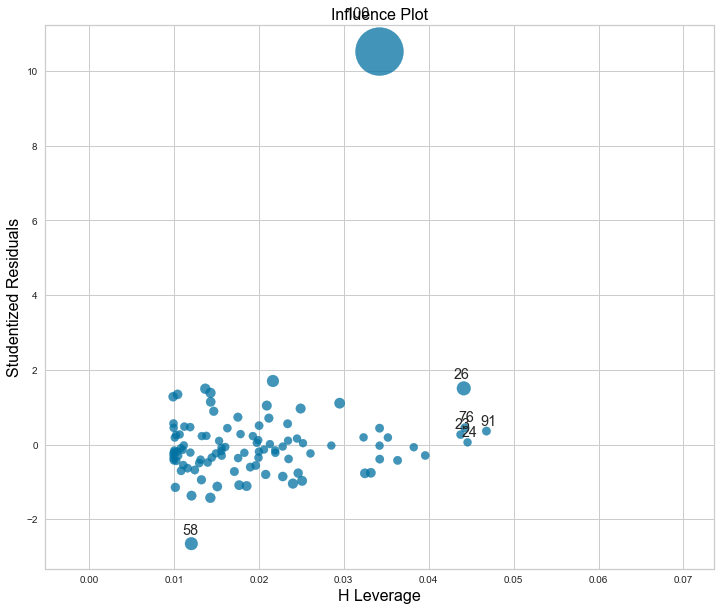

In [62]:
# Influence plot to visualize outliers
fig, ax = plt.subplots(figsize=(12,10))
fig = sma.graphics.influence_plot(fitted5, ax=ax, criterion="cooks")

**The influence plot shows that there are outliers present in the given dataset which we need to remove.**

(101, 2)
(92, 2)


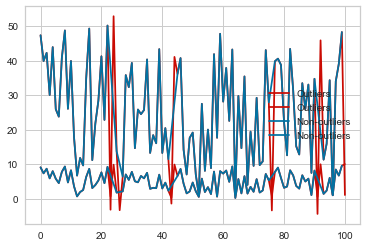

In [63]:
#Removing outliers after calculating z-score

df5= data_5[(np.abs(stats.zscore(data_5)) < 1.7).all(axis=1)]
plt.plot(data_5,'r', label='Outliers')
plt.plot(df5, 'b' ,label='Non-outliers')
plt.legend()

print(data_5.shape)
print(df5.shape)

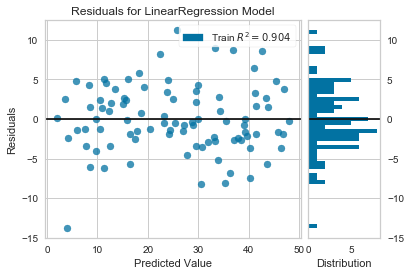

In [64]:
#Residual plot after removing outliers

X = df5['X'].values.reshape(-1,1)
y = df5['Y'].values.reshape(-1,1)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X, y)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [65]:
#OLS full report after removing outliers

formula_str = df5.columns[-1]+' ~ '+'+'.join(df5.columns[:-1])
model=sm.ols(formula=formula_str, data=df5)
fitted = model.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                      X   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     848.0
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           1.37e-47
Time:                        17:56:56   Log-Likelihood:                -111.13
No. Observations:                  92   AIC:                             226.3
Df Residuals:                      90   BIC:                             231.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2720      0.183      1.486      0.1

**Set 5 is re-fitted to OLS model after removing outliers and the R^2 increased from 0.806 to 0.906.

# Dataset 6

In [66]:
data_6 = pd.read_excel('Assignment4_linear_regresion_data.xlsx', 'Set 6')

In [67]:
data_6.describe()

,y,x
count,101.000000,101.000000
mean,39.178208,5.618743
std,31.390864,4.268607
min,-6.757358,0.111800
25%,19.890518,2.539300
50%,39.493906,5.446000
75%,56.813645,8.108500
max,252.837897,35.783400


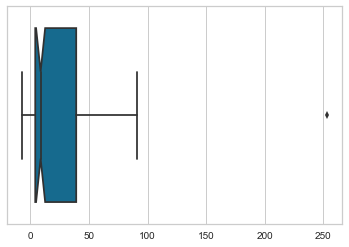

In [68]:
# Boxplot to visualize outliers
sns.boxplot(data_6, notch=True)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


The slope is: 0.12994185437336198
The intercept is: 0.5278536014227448


<Figure size 360x360 with 0 Axes>

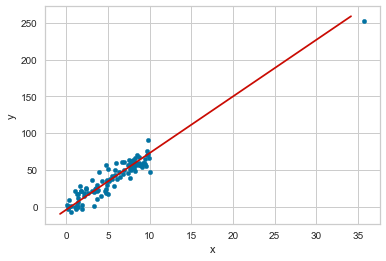

In [69]:
#implement least squares to find b
xi = data_6['x']
yi = data_6['y']
x_mean = xi.mean()
y_mean = yi.mean()

num = np.sum(np.multiply((xi - x_mean), (yi-y_mean)))
denom = np.sum(np.square(yi-y_mean))
b = num / denom
a = x_mean - b * y_mean

print('The slope is:', b)
print('The intercept is:', a)

#plot the regression line as x and y
y = np.arange(-10, 260)
x = a + b * y

#plot the original data with the regression line

fig = plt.figure(figsize=(5,5))
data_6.plot.scatter('x','y')
plt.plot(x, y, c='r')
plt.show()

**From the scatter plot we can see that the relation between both variables is linear so linear model can be applied.** 

In [70]:
# OLS full report
formula_str = data_6.columns[-1]+' ~ '+'+'.join(data_6.columns[:-1])
model=sm.ols(formula=formula_str, data=data_6)
fitted6 = model.fit()
print(fitted6.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     1041.
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           2.49e-54
Time:                        17:56:56   Log-Likelihood:                -166.00
No. Observations:                 101   AIC:                             336.0
Df Residuals:                      99   BIC:                             341.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5279      0.202      2.615      0.0

**Intercept Interpretation:** As P>|t| is close to 0 for intercept indicates it is a significant predictor of y.

**Slope Interpretation:** As P>|t| is close to 0 indicates that x is a significantly important predictor of y.

**$R^2$ Interpretation:** The $R^2$ of a linear model describes the amount of variation in the response that is explained by the least squares line. For the given dataset $R^2$ is 0.913 which means only 91.3% of total variance in y can be explained by the linear model.

**The residuals are normally distributed and centered on 0, with a skew close to 0 and kurtosis close to 3. The variability of the residuals is constant along the whole range since the Prob(Omnibus) is close to 1 and Ombibus is close to 0. The Durbin-Watson statistic is close to 2, indicating that there is no autocorrelation in the data and the observations are independent.**

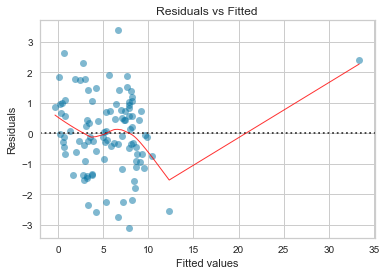

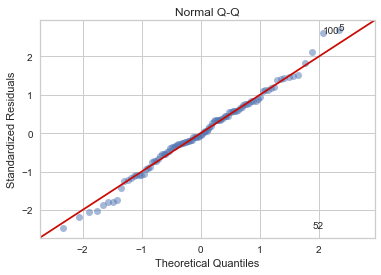

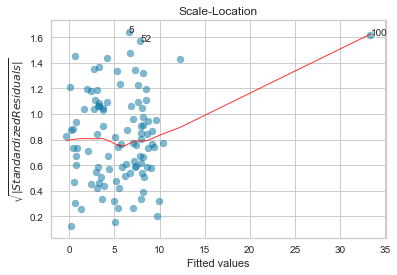

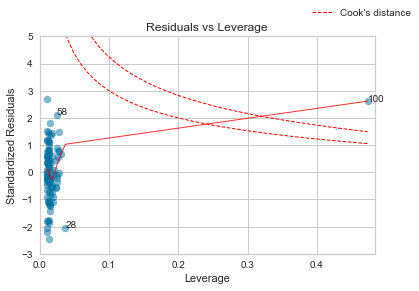

In [71]:
#Plots to verify linearity assumptions

# Residual vs Fitted Plot

model_fitted_y = fitted6.fittedvalues
# model residuals
model_residuals = fitted6.resid
# normalized residuals
model_norm_residuals = fitted6.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# leverage, from statsmodels internals
model_leverage = fitted6.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
model_cooks = fitted6.get_influence().cooks_distance[0]

plot_lm_1 = plt.figure()
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, data_6.columns[-1], data=data_6,
                          lowess=True,
                          scatter_kws={'alpha': 0.5},
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals');

# Normal QQ Plot

QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]
for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i,
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]));
    
#Scale-location vs Fitted values plot

plot_lm_3 = plt.figure()
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, xy=(model_fitted_y[i], model_norm_residuals_abs_sqrt[i]));
    
#Residual vs Leverage plot

def graph(formula, x_range, label=None):
    """
    Helper function for plotting cook's distance lines
    """
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

plot_lm_4 = plt.figure();
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals, scatter=False, ci=False, lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, xy=(model_leverage[i], model_norm_residuals[i]));

p = len(fitted.params) # number of model parameters
graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), np.linspace(0.001, max(model_leverage), 50),
        'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), np.linspace(0.001, max(model_leverage), 50)) # 1 line
plot_lm_4.legend(loc='upper right');

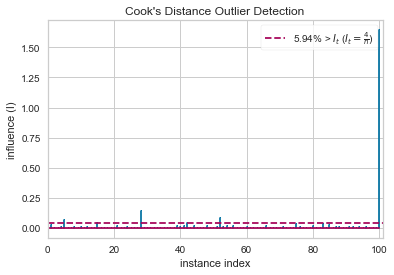

In [72]:
# Plotting cook's plot to visualize outliers using yellowbrick api 
# Instantiate and fit the visualizer
X = data_6['y'].values.reshape(-1,1)
y = data_6['x']
visualizer = CooksDistance()
visualizer.fit(X, y)
visualizer.show()

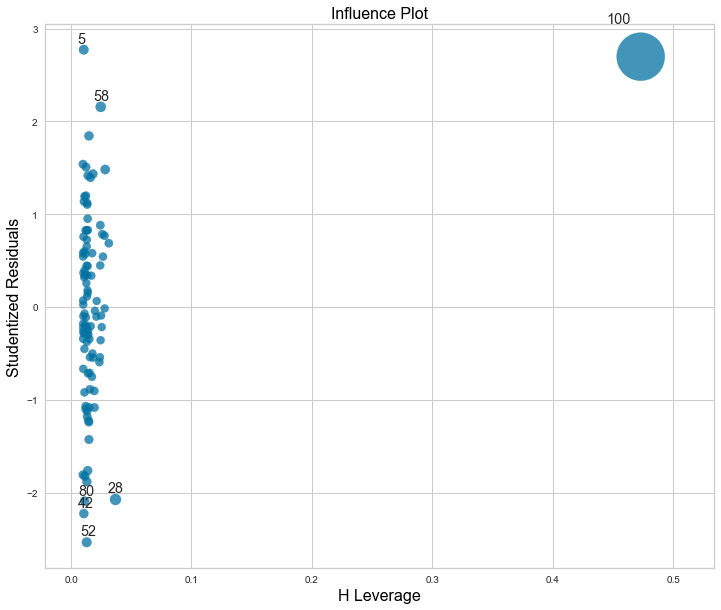

In [73]:
#Influence plot to visualize outliers

fig, ax = plt.subplots(figsize=(12,10))
fig = sma.graphics.influence_plot(fitted6, ax=ax, criterion="cooks")

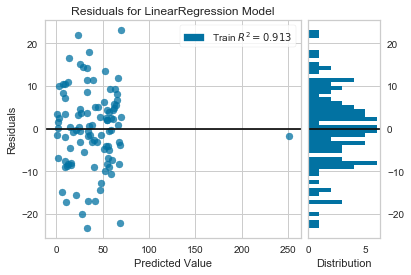

In [74]:
#Residual plot before removing outliers

X = data_6['x'].values.reshape(-1,1)
y = data_6['y'].values.reshape(-1,1)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X, y)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

(101, 2)
(100, 2)


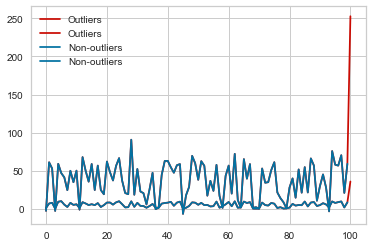

In [75]:
#Removing outliers after calculating z-score

df6= data_6[(np.abs(stats.zscore(data_6)) < 3).all(axis=1)]
plt.plot(data_6,'r', label='Outliers')
plt.plot(df6, 'b' ,label='Non-outliers')
plt.legend()
print(data_6.shape)
print(df6.shape)

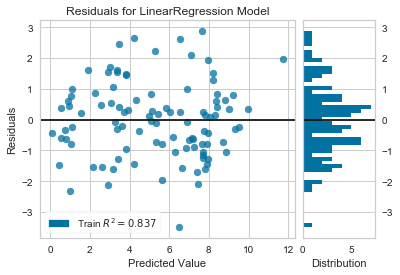

In [76]:
#Residual plot after removing outliers

X = df6['y'].values.reshape(-1,1)
y = df6['x'].values.reshape(-1,1)

# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X, y)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

In [77]:
# OLS full report after removing outlier
formula_str = df6.columns[-1]+' ~ '+'+'.join(df6.columns[:-1])
model=sm.ols(formula=formula_str, data=df6)
fitted6 = model.fit()
print(fitted6.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     502.7
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           2.29e-40
Time:                        17:56:59   Log-Likelihood:                -161.27
No. Observations:                 100   AIC:                             326.5
Df Residuals:                      98   BIC:                             331.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8699      0.233      3.731      0.0

**In this dataset(Set 6) analyzing outlier is bit tricky. There is one point that lie far from the cloud, however, it falls very close to the regression line and does not appear to be influential. So, removing this observation is not a good idea.**

In [78]:
# # Isolation forest to detect outliers

# from sklearn.ensemble import IsolationForest
# clf = IsolationForest()
# preds = clf.fit_predict(data_6)
# preds

# # DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm commonly used for 
# # outlier detection

# from sklearn.cluster import DBSCAN
# data = data_6.iloc[:, 0:2].values

# model = DBSCAN(eps= 3, min_samples=2).fit(data)

# # Slicing array
# array1 = data[:, 0]
# # Slicing array
# array2 = data[:, 1]

# # Scatter plot function
# colors = model.labels_
# plt.scatter(array1, array2, c=colors, marker='o')
# plt.xlabel('y', fontsize=16)
# plt.ylabel('x', fontsize=16)
# plt.show()

**Submitted by: Manjeet Kaur**